### Questions

Dataset : https://www.kaggle.com/uciml/pima-indians-diabetes-database

1. Split the dataset (80, 20) into training and testing set.
2. Train a Linear Regression model to predict "BMI" using all other features available in the dataset.
3. Plot the "Cost function vs Iterations" curve.
4. Perform greedy search to find optimal learning rate.  
5. Plot the "Predicted BMI value($\hat{Y}_i$)" vs "Actual BMI value(${Y}_i$)" curve (Scatter Plot).
6. Perform PCA on the dataset and reduce the dimensionality to 2 and train a new model on these newly obtained features.
7. Plot the "Cost function vs Iterations" curve for this new model.
8. Plot the "Predicted BMI value($\hat{Y}_i$) of the new model" vs "Actual BMI value(${Y}_i$)" curve(it is a scatter plot)
9. Show the scatter plot of PCA generated new features and also show the linear regression curve that you got from new model.

**You can use libraries to solve these questions**

Sample plot for 8th step
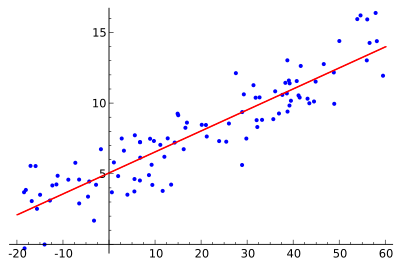

In [1]:
# import all nececssary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# split the dataset into train and test set
data = pd.read_csv("diabetes.csv")
x = data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","DiabetesPedigreeFunction","Age","Outcome"]]
y = data[["BMI"]]
sc_x= StandardScaler()
xTrain,xTest,yTrain,yTest = train_test_split(x,y, test_size=0.2, random_state=18)
xCopy = sc_x.fit_transform(xTrain)
XTestCopy = sc_x.transform(xTest)
lr.fit(xCopy,yTrain)
xTrain.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
29,5,117,92,0,0,0.337,38,0
286,5,155,84,44,545,0.619,34,0
35,4,103,60,33,192,0.966,33,0
392,1,131,64,14,415,0.389,21,0
12,10,139,80,0,0,1.441,57,0


In [3]:
# perform greedy search to find optimal learning rate.

def extractfeatures(filename):
    x=np.genfromtxt(filename,delimiter=',')
    xfeatures=x[1:,1]
    y=x[1:,2]
    return xfeatures,y

def computeCost(X,y,theta):
    m=len(y)
    J=0#iterative solution
    s=0
    for i in range(0,m):
        s=s+((theta[0]+theta[1]*X[i,1])-y[i])**2
    J=s/(2*m)

    y=y.reshape(m,1)#vectorized solution
    J1=(np.dot((np.dot(X,theta)-y).T,(np.dot(X,theta)-y)))/(2*m)

    return J

def gradientDescent(X,y,theta,alpha,iterations):
    J_history=np.zeros((iterations,1))

    m=len(y)# number of training examples
    y=y.reshape(m,1)
    for iter in range(0,iterations):
        s1=0
        s0=0
        for i in range(0,m):
            s1+=((theta[0]+theta[1]*X[i,1])-y[i])*X[i,1]
            s0+=((theta[0]+theta[1]*X[i,1])-y[i])
        theta[0]=theta[0]-alpha*s0/m
        theta[1]=theta[1]-alpha*s1/m
        J_history[iter]=computeCost(X,y,theta)
    return theta,J_history

Average Mean squared error in Training data prediction is 42.942341807914026
Average Mean squared error in Testing data prediction is 57.81554858534189


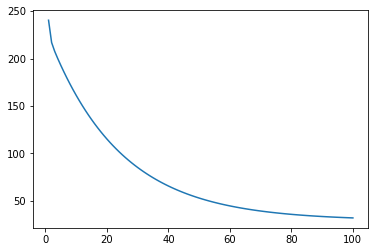

In [4]:
# Plot the "cost function vs iterations" curve

m = len(np.asarray(yTrain))

theta=np.ones((2,1))#initialize fitting parameters
input_X=np.c_[np.ones((m,1)),np.asarray(xTrain["Pregnancies"])]#Add a column of ones to X
iterations=100
alpha = 0.05

theta1,J_history=gradientDescent(input_X,np.asarray(yTrain),theta,alpha,iterations)#gets the final data and the values of cost function in each iteration
a = np.arange(start = 1, stop = len(J_history)+1)
plt.plot(a,J_history)

print("Average Mean squared error in Training data prediction is", mean_squared_error(lr.predict(xCopy),yTrain))
print("Average Mean squared error in Testing data prediction is", mean_squared_error(lr.predict(XTestCopy),yTest))

Using Greedy Search, it is found that optimal theta values for column  1  are  [[28.5206753 ]
 [ 0.54992881]]



<ipython-input-3-ff1e944e7b1b>:14: RuntimeWarning: overflow encountered in add
  s=s+((theta[0]+theta[1]*X[i,1])-y[i])**2
<ipython-input-3-ff1e944e7b1b>:14: RuntimeWarning: overflow encountered in square
  s=s+((theta[0]+theta[1]*X[i,1])-y[i])**2


Using Greedy Search, it is found that optimal theta values for column  2  are  [[5.63952273e+287]
 [7.35388398e+289]]



<ipython-input-3-ff1e944e7b1b>:14: RuntimeWarning: overflow encountered in add
  s=s+((theta[0]+theta[1]*X[i,1])-y[i])**2
<ipython-input-3-ff1e944e7b1b>:14: RuntimeWarning: overflow encountered in square
  s=s+((theta[0]+theta[1]*X[i,1])-y[i])**2


Using Greedy Search, it is found that optimal theta values for column  3  are  [[3.29408686e+238]
 [2.45164857e+240]]

Using Greedy Search, it is found that optimal theta values for column  4  are  [[-6.58059751e+147]
 [-2.17068271e+149]]



<ipython-input-3-ff1e944e7b1b>:14: RuntimeWarning: overflow encountered in square
  s=s+((theta[0]+theta[1]*X[i,1])-y[i])**2


Using Greedy Search, it is found that optimal theta values for column  5  are  [[1.66485385e+298]
 [4.22881329e+300]]

Using Greedy Search, it is found that optimal theta values for column  6  are  [[27.19958172]
 [10.17463185]]



<ipython-input-3-ff1e944e7b1b>:14: RuntimeWarning: overflow encountered in add
  s=s+((theta[0]+theta[1]*X[i,1])-y[i])**2
<ipython-input-3-ff1e944e7b1b>:14: RuntimeWarning: overflow encountered in square
  s=s+((theta[0]+theta[1]*X[i,1])-y[i])**2


Using Greedy Search, it is found that optimal theta values for column  7  are  [[2.82781866e+176]
 [1.05998991e+178]]

Using Greedy Search, it is found that optimal theta values for column  8  are  [[29.39379913]
 [ 7.0615286 ]]



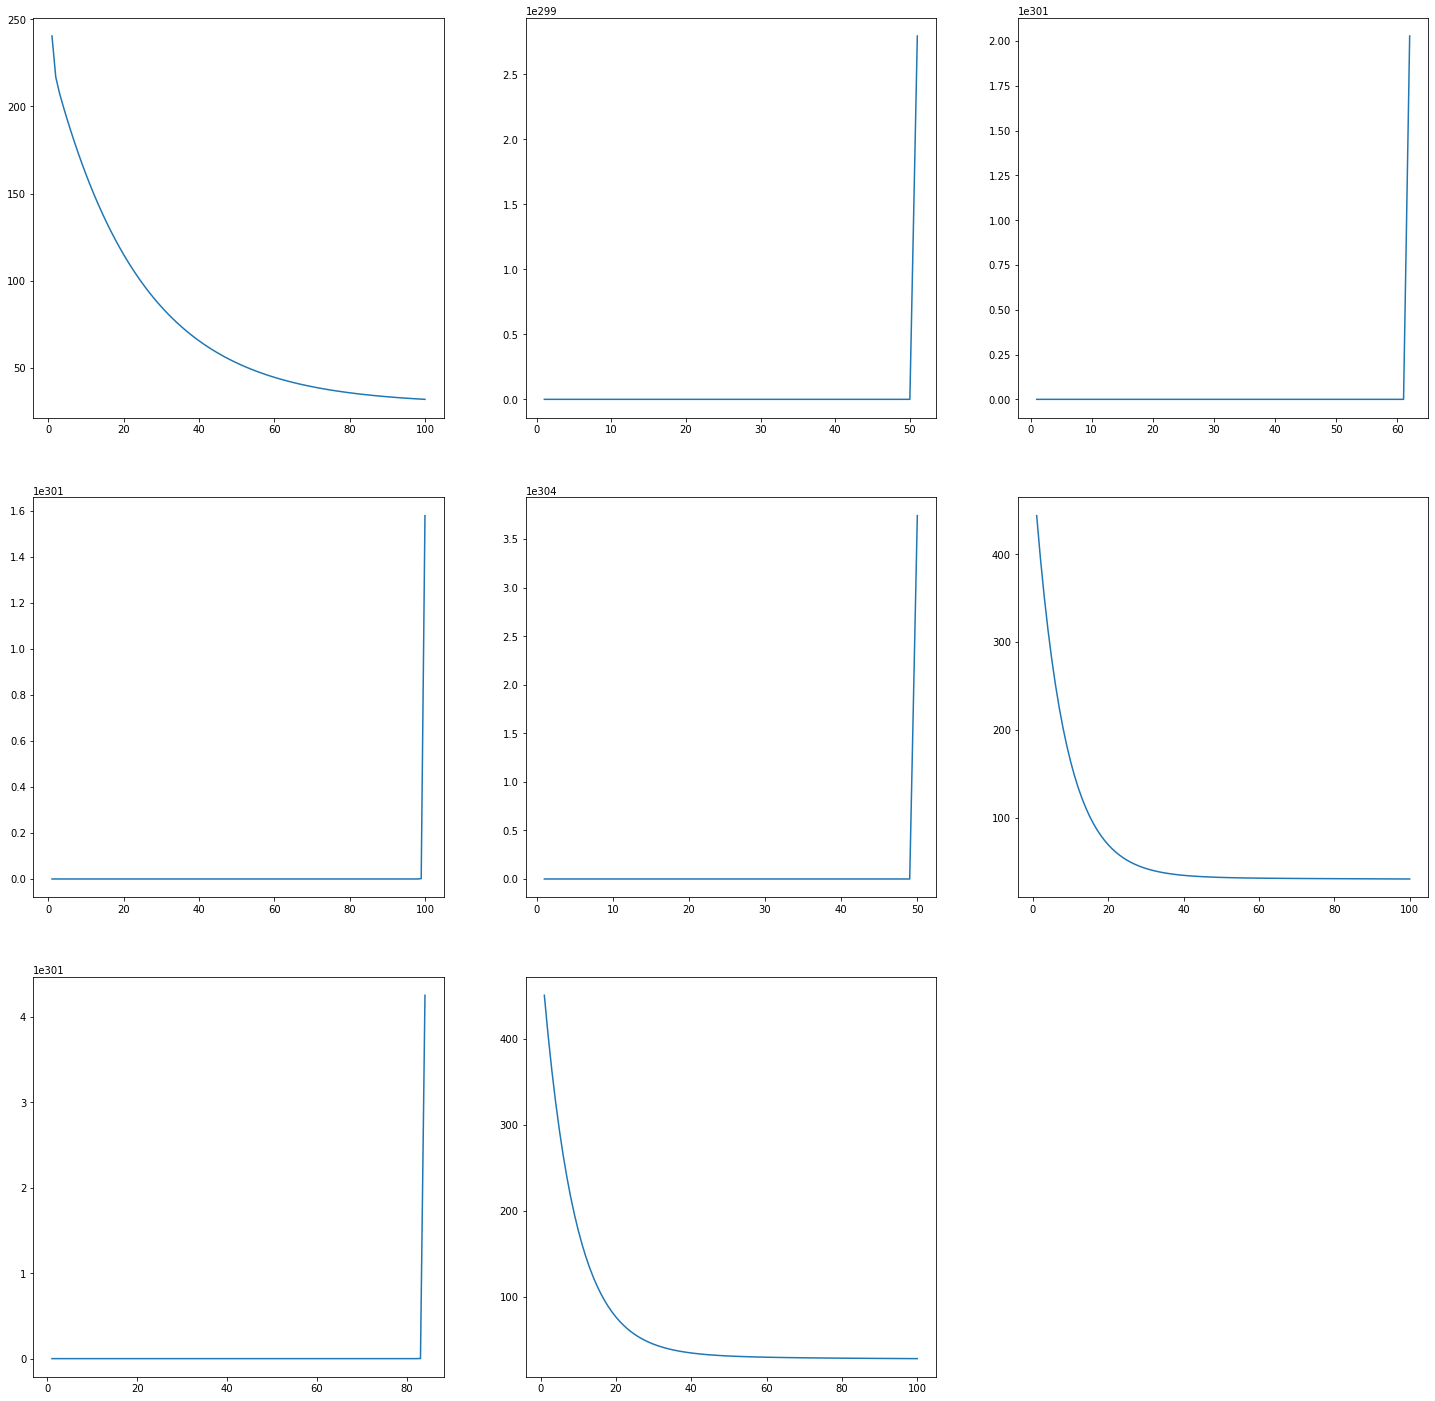

In [5]:
# Learning plot for all predictors
figDraw = plt.figure(figsize = (25,25))
dia1 = figDraw.add_subplot(3,3,1) 

i = 1
m = len(np.asarray(yTrain))
theta=np.ones((2,1))#initialize fitting parameters
input_X=np.c_[np.ones((m,1)),np.asarray(xTrain["Pregnancies"])]#Add a column of ones to X
iterations=100
alpha = 0.05
theta1,J_history=gradientDescent(input_X,np.asarray(yTrain),theta,alpha,iterations)#gets the final data and the values of cost function in each iteration
a = np.arange(start = 1, stop = len(J_history)+1)
dia1.plot(a,J_history)
print("Using Greedy Search, it is found that optimal theta values for column ",i," are ",theta)
print()
i = i+1

dia2 = figDraw.add_subplot(3,3,2) 
theta=np.ones((2,1))#initialize fitting parameters
input_X=np.c_[np.ones((m,1)),np.asarray(xTrain["Glucose"])]#Add a column of ones to X
iterations=100
alpha = 0.05
theta1,J_history=gradientDescent(input_X,np.asarray(yTrain),theta,alpha,iterations)#gets the final data and the values of cost function in each iteration
a = np.arange(start = 1, stop = len(J_history)+1)
dia2.plot(a,J_history)
print("Using Greedy Search, it is found that optimal theta values for column ",i," are ",theta)
print()
i = i+1

dia3 = figDraw.add_subplot(3,3,3)  
theta=np.ones((2,1))#initialize fitting parameters
input_X=np.c_[np.ones((m,1)),np.asarray(xTrain["BloodPressure"])]#Add a column of ones to X
iterations=100
alpha = 0.05
theta1,J_history=gradientDescent(input_X,np.asarray(yTrain),theta,alpha,iterations)#gets the final data and the values of cost function in each iteration
a = np.arange(start = 1, stop = len(J_history)+1)
dia3.plot(a,J_history)
print("Using Greedy Search, it is found that optimal theta values for column ",i," are ",theta)
print()
i = i+1

dia4 = figDraw.add_subplot(3,3,4)  
theta=np.ones((2,1))#initialize fitting parameters
input_X=np.c_[np.ones((m,1)),np.asarray(xTrain["SkinThickness"])]#Add a column of ones to X
iterations=100
alpha = 0.05
theta1,J_history=gradientDescent(input_X,np.asarray(yTrain),theta,alpha,iterations)#gets the final data and the values of cost function in each iteration
a = np.arange(start = 1, stop = len(J_history)+1)
dia4.plot(a,J_history)
print("Using Greedy Search, it is found that optimal theta values for column ",i," are ",theta)
print()
i = i+1

dia5 = figDraw.add_subplot(3,3,5)  
theta=np.ones((2,1))#initialize fitting parameters
input_X=np.c_[np.ones((m,1)),np.asarray(xTrain["Insulin"])]#Add a column of ones to X
iterations=100
alpha = 0.05
theta1,J_history=gradientDescent(input_X,np.asarray(yTrain),theta,alpha,iterations)#gets the final data and the values of cost function in each iteration
a = np.arange(start = 1, stop = len(J_history)+1)
dia5.plot(a,J_history)
print("Using Greedy Search, it is found that optimal theta values for column ",i," are ",theta)
print()
i = i+1

dia6 = figDraw.add_subplot(3,3,6)  
theta=np.ones((2,1))#initialize fitting parameters
input_X=np.c_[np.ones((m,1)),np.asarray(xTrain["DiabetesPedigreeFunction"])]#Add a column of ones to X
iterations=100
alpha = 0.05
theta1,J_history=gradientDescent(input_X,np.asarray(yTrain),theta,alpha,iterations)#gets the final data and the values of cost function in each iteration
a = np.arange(start = 1, stop = len(J_history)+1)
dia6.plot(a,J_history)
print("Using Greedy Search, it is found that optimal theta values for column ",i," are ",theta)
print()
i = i+1

dia7 = figDraw.add_subplot(3,3,7)  
theta=np.ones((2,1))#initialize fitting parameters
input_X=np.c_[np.ones((m,1)),np.asarray(xTrain["Age"])]#Add a column of ones to X
iterations=100
alpha = 0.05
theta1,J_history=gradientDescent(input_X,np.asarray(yTrain),theta,alpha,iterations)#gets the final data and the values of cost function in each iteration
a = np.arange(start = 1, stop = len(J_history)+1)
dia7.plot(a,J_history)
print("Using Greedy Search, it is found that optimal theta values for column ",i," are ",theta)
print()
i = i+1

dia8 = figDraw.add_subplot(3,3,8)  
theta=np.ones((2,1))#initialize fitting parameters
input_X=np.c_[np.ones((m,1)),np.asarray(xTrain["Outcome"])]#Add a column of ones to X
iterations=100
alpha = 0.05
theta1,J_history=gradientDescent(input_X,np.asarray(yTrain),theta,alpha,iterations)#gets the final data and the values of cost function in each iteration
a = np.arange(start = 1, stop = len(J_history)+1)
dia8.plot(a,J_history)
print("Using Greedy Search, it is found that optimal theta values for column ",i," are ",theta)
print()
i = i+1


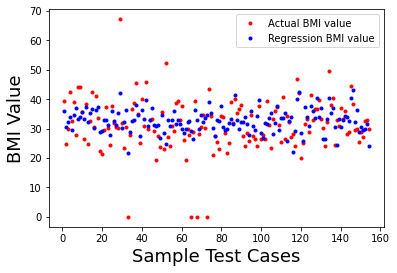

In [6]:
# plot the "Predicted BMI value( 𝑌̂ 𝑖 )" vs "Actual BMI value( 𝑌𝑖 )" curve(it is a scatter plot)
a = np.arange(start = 1, stop = len(yTest)+1)
plt.figure(1)
plt.plot(a, yTest, 'r.', label = "Actual BMI value")
plt.plot(a, lr.predict(XTestCopy), 'b.', label = "Regression BMI value")
plt.xlabel("Sample Test Cases", fontsize=18)
plt.legend(loc="best")
plt.ylabel("BMI Value", fontsize=18)
plt.show()

In [7]:
# Saving output file to csv
newOP = yTest
newOP["Predicted BMI"] = lr.predict(XTestCopy)

<ipython-input-7-0ae127a96d95>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newOP["Predicted BMI"] = lr.predict(XTestCopy)


In [8]:
# perform PCA on the dataset and reduce the dimensionality to 2 and train a new model on these newly obtained features.
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principal = pd.DataFrame(data = principalComponents, columns = ["PC1","PC2"])
xTrain,xTest,yTrain,yTest = train_test_split(principal,y, test_size=0.2, random_state=18)
lr.fit(xTrain,yTrain)
principal.head()

,PC1,PC2
0,-75.746707,-35.807586
1,-82.290258,28.786540
2,-74.517886,-68.418067
3,11.134371,34.751662
4,89.597973,-2.366079


<ipython-input-3-ff1e944e7b1b>:14: RuntimeWarning: overflow encountered in add
  s=s+((theta[0]+theta[1]*X[i,1])-y[i])**2
<ipython-input-3-ff1e944e7b1b>:14: RuntimeWarning: overflow encountered in square
  s=s+((theta[0]+theta[1]*X[i,1])-y[i])**2
<ipython-input-3-ff1e944e7b1b>:14: RuntimeWarning: overflow encountered in square
  s=s+((theta[0]+theta[1]*X[i,1])-y[i])**2


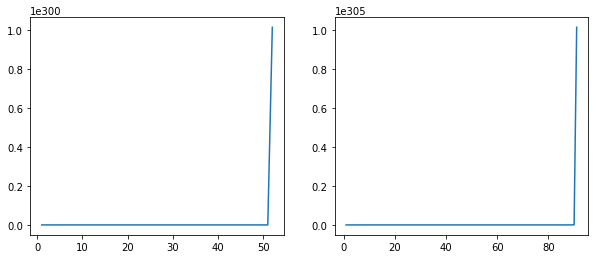

In [9]:
# plot the "cost function vs iterations" curve for this new model.
figDraw = plt.figure(figsize = (10,4))

m = len(np.asarray(yTrain))
dia1 = figDraw.add_subplot(1,2,1) 
theta=np.ones((2,1))#initialize fitting parameters
input_X=np.c_[np.ones((m,1)),np.asarray(xTrain["PC1"])]
iterations=100
alpha = 0.05

theta1,J_history=gradientDescent(input_X,np.asarray(yTrain),theta,alpha,iterations)#gets the final data and the values of cost function in each iteration
a = np.arange(start = 1, stop = len(J_history)+1)
dia1.plot(a,J_history)


dia2 = figDraw.add_subplot(1,2,2) 
theta=np.ones((2,1))#initialize fitting parameters
input_X=np.c_[np.ones((m,1)),np.asarray(xTrain["PC2"])]
iterations=100
alpha = 0.05

theta1,J_history=gradientDescent(input_X,np.asarray(yTrain),theta,alpha,iterations)#gets the final data and the values of cost function in each iteration
a = np.arange(start = 1, stop = len(J_history)+1)
dia2.plot(a,J_history)

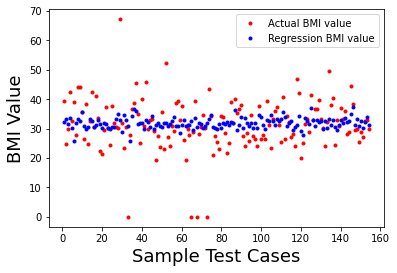

In [10]:
# plot the "Predicted BMI value( 𝑌̂ 𝑖 ) of the new model" vs "Actual BMI value( 𝑌𝑖 )" curve(it is a scatter plot)
XTest = xTest
a = np.arange(start = 1, stop = len(yTest)+1)
plt.figure(1)
plt.plot(a, yTest, 'r.', label = "Actual BMI value")
plt.plot(a, lr.predict(XTest), 'b.', label = "Regression BMI value")
plt.xlabel("Sample Test Cases", fontsize=18)
plt.legend(loc="best")
plt.ylabel("BMI Value", fontsize=18)
plt.show()

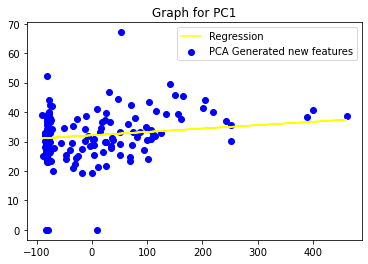

In [11]:
# show the scatter plot of PCA generated new features and also show the linear regression curve that you got from new model.

xTrain2 = xTrain["PC1"]
xTrain2 = xTrain2.values.reshape(-1,1)
xTest2 = xTest["PC1"]
xTest2 = xTest2.values.reshape(-1,1)
lr.fit(xTrain2,yTrain)

plt.scatter(xTest2,yTest,color="blue",label="PCA Generated new features")
plt.plot(xTest2,lr.predict(xTest2),color="yellow",label="Regression")
plt.legend(loc="best")
plt.title("Graph for PC1")
plt.show()

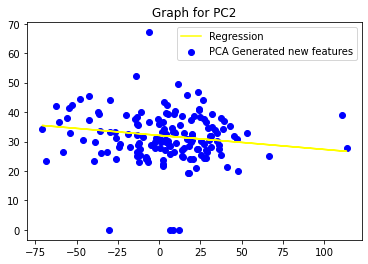

In [12]:
# show the scatter plot of PCA generated new features and also show the linear regression curve that you got from new model.

xTrain3 = xTrain["PC2"]
xTrain3 = xTrain3.values.reshape(-1,1)
xTest3 = xTest["PC2"]
xTest3 = xTest3.values.reshape(-1,1)
lr.fit(xTrain3,yTrain)

plt.scatter(xTest3,yTest,color="blue",label="PCA Generated new features")
plt.plot(xTest3,lr.predict(xTest3),color="yellow",label="Regression")
plt.legend(loc="best")
plt.title("Graph for PC2")
plt.show()

In [13]:
newOP["Predicted BMI with PCA"] = lr.predict(xTest2)
newOP.to_csv("FinalCSV.csv", sep=',', index=False)

<ipython-input-13-788a2262a1ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newOP["Predicted BMI with PCA"] = lr.predict(xTest2)
